# Project: Will Costumers leave soon? 

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
This project was used to create the best machine learning model that predicts whether a customer will leave the bank soon based on the data of clients’ past behavior and termination of contracts with the bank.

The project consisted of creating a DecissionTreeClassifier and a RandomForestClassifier model from the data;  tuning each of the models' hyperparameters to obtain the highest F1 score, accuracy score, and AUC value from the ROC curve;  The best model with the highest F1, accuracy, and AUC values was picked for the findings of task research. The threshold for the F1 score was a score of at least 0.59.


## Libraries Used for Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import f1_score, roc_curve, accuracy_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn import metrics, linear_model
import warnings 


%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

## Description of Data
The data file was saved in the variable `data`. 

In [2]:
data= pd.read_csv('/datasets/Churn.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


The data had the following columns described below: 

- `RowNumber` — data string index
- `CustomerId` — unique customer identifier
- `Surname` — surname
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — period of maturation for a customer’s fixed deposit (years)
- `Balance` — account balance
- `NumOfProducts` — number of banking products used by the customer
- `HasCrCard` — customer has a credit card
- `IsActiveMember` — customer’s activeness
- `EstimatedSalary` — estimated salary
- `Exited` — сustomer has left

The data had a total of 14 columns and 10,000 row entries, each entry describing the behavior of a costumer. The column that presented missing data was the column `Tenure`. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


## Preparing the data for Analysis 

In this section, we analysed the columns' data type and fixed the missing data, duplicates, and other errors in data. 

### `column names` in data
The column names were changed to all lowercase.

In [5]:
data= data.rename(columns=str.lower)
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

### `rownumber` column
The section below was used to determine if there were any duplicates in the column `rownumber`. This number had Int64 data type, with 10,000 unique values that ranged from 1 to 10,000. No errors were found in this column. Each unique value in this column is associated with one costumer. 

In [6]:
print(data.rownumber.unique())
print(data.rownumber.min())
print(data.rownumber.max())
len(data.rownumber.unique())

[    1     2     3 ...  9998  9999 10000]
1
10000


10000

### `customerid` column 
The `customerid` column had a total of 10,000 unique IDs the costumers. The datatype for this column is Int64 and there were no errors in the data for this column. 

In [7]:
print(len(data.customerid.unique()))
data.customerid.head(10)


10000


0    15634602
1    15647311
2    15619304
3    15701354
4    15737888
5    15574012
6    15592531
7    15656148
8    15792365
9    15592389
Name: customerid, dtype: int64

### `surname` column
The `surname` column had a total of 2,032 unique surnames for all of the costumers in the data. The datatype is object, and there were no missing or errors in the data. 

In [8]:
print(len(data.surname.unique()))
len(data.query('surname.isna()'))


2932


0

### `creditscore` column
The `creditscore` column has 460 unique values and Int64 datatype. There weren't any missing values or errors in the data. 

In [9]:
print(len(data.creditscore.unique()))
print(data.creditscore.dtype)
len(data.query('creditscore.isna()'))


460
int64


0

### `geography` column
The `geography` column has 3 unique values, and the data type was object. There weren't any errors or missing data in the column. 

In [10]:
print(data.geography.unique())
print(data.geography.dtype)
len(data.query('geography.isna()'))

['France' 'Spain' 'Germany']
object


0

### `gender` column 
The gender column had 2 unique values and the data type was object. There weren't any errors or missing values in the data. 

In [11]:
print(data.gender.unique())
print(data.gender.dtype)
len(data.query('gender.isna()'))

['Female' 'Male']
object


0

### `age` column
The age column had a total of 70 unique values and the data type was int64. There were no errors or missing data in the column. 

In [12]:
print(data.age.unique())
print(len(data.age.unique()))
print(data.age.dtype)
len(data.query('age.isna()'))

[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
70
int64


0

### `tenure` column 
The `tenure` column had a total of 11 values, ranging from 0 to 10. The data type was float64, and there were a total of 909 missing values in this column, which account for 9.1% of the data for this column; therefore, dropping the rows with missing values would cause a significant loss of data. 

In [13]:
print(data.tenure.unique())
print(len(data.tenure.unique()))
print(data.tenure.dtype)
#percentage of missing values from entire data
len(data.query('tenure.isna()'))/len(data) *100

[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]
12
float64


9.09

The `tenure` column presented a mean value of 4.99 years, median value of 5.00 years, and standard deviation of 2.89 years. The distribution was normally distributed, and there were no outliers. To replace the missing values in the `tenure` column, the mean value was used to replace the NaN values in the column.

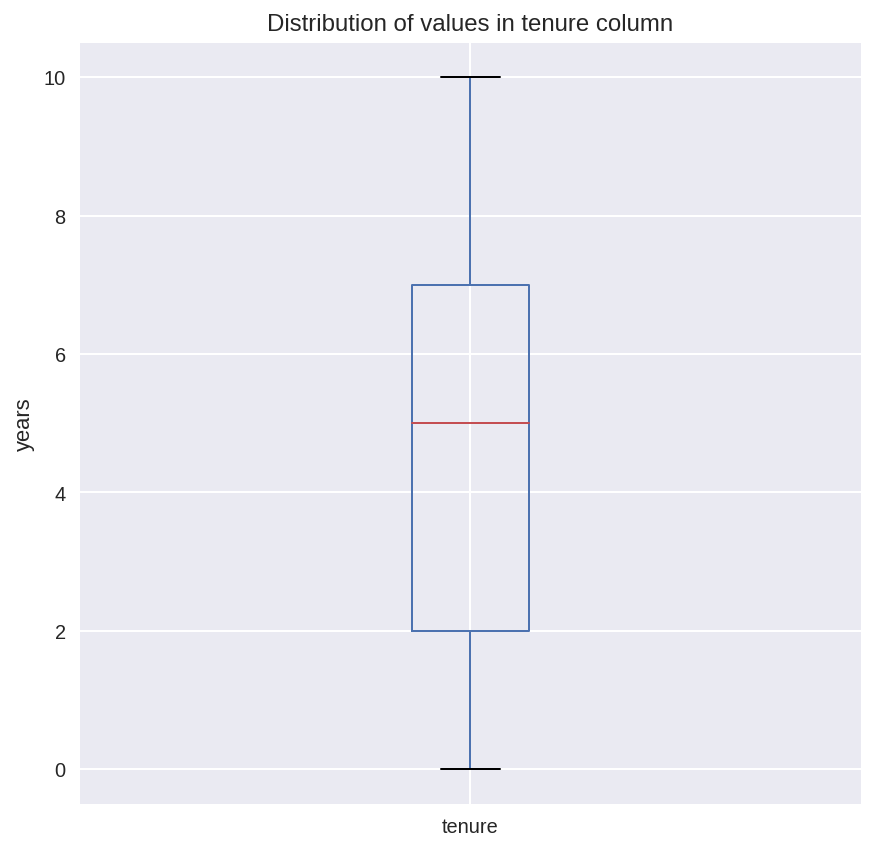

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [14]:
data.tenure.plot(kind='box', figsize=(7,7))
plt.title('Distribution of values in tenure column')
plt.ylabel('years')
plt.show()

data.tenure.describe()

In [15]:
data.tenure.fillna(data.tenure.mean(), inplace=True)
#checking the column after fixing missing values 
data['tenure']=data.tenure.round(decimals=1)
data.tenure.unique()


array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0.])

### `balance` column
The `balance` column had a total of 6,382 unique values, and a data type is float64. There were not any missing or errors in the column. 

In [16]:
print(data.balance.unique())
print(len(data.balance.unique()))
print(data.balance.dtype)
len(data.query('balance.isna()'))

[     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
6382
float64


0

### `numofproducts` column 
The `numofproducts` column had a total of 4 unique values, and a dat type is int64. There were not any errors or missing values in the column. 

In [17]:
print(data.numofproducts.unique())
print(len(data.numofproducts.unique()))
print(data.numofproducts.dtype)
len(data.query('numofproducts.isna()'))

[1 3 2 4]
4
int64


0

### `hascrcard` column
The `hascrcard` has a total of 2 unique values in the column , and the data type is int64. There were not any errors or missing values in the column. 

In [18]:
print(data.hascrcard.unique())
print(len(data.hascrcard.unique()))
print(data.hascrcard.dtype)
len(data.query('hascrcard.isna()'))

[1 0]
2
int64


0

### `isactivemember` column 
The `isactivemember` has a total of 2 unique values in the column , and the data type is int64. There were not any errors or missing values in the column. 

In [19]:
print(data.isactivemember.unique())
print(len(data.isactivemember.unique()))
print(data.isactivemember.dtype)
len(data.query('isactivemember.isna()'))

[1 0]
2
int64


0

### `estimatedsalary` column
The `estimatedsalary` column had a total of 9,999 unique values in the column, and the data type was float64. There were not any errors or missing values in the data. 

In [20]:
print(data.estimatedsalary.unique())
print(len(data.estimatedsalary.unique()))
print(data.estimatedsalary.dtype)
len(data.query('estimatedsalary.isna()'))

[101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
9999
float64


0

## Model 1: DecisionTreeClassifier 
In this section we split the `data` into training, validation, and testing dataset in 2:1:1 ratio, or 60%, 20%, and 20%, respectively. The data was transformed with means of OrdinalEncoder, as shown below. However, the columns that were cardinal features were kept as they were originally present in the data, and then transformed with means of feature scaling, as shown below. The resulting dimensions for features and target for the training, validation, and testing set were prited below. 

In [21]:
encoder= OrdinalEncoder()
data_ordinal=pd.DataFrame(encoder.fit_transform(data),columns=data.columns)
data_ordinal['creditscore']=data['creditscore']
data_ordinal['age']=data['age']
data_ordinal['tenure']=data['tenure']
data_ordinal['balance']=data['balance']
data_ordinal['numofproducts']=data['numofproducts']
data_ordinal['estimatedsalary']=data['estimatedsalary']

features = data_ordinal.drop('exited',axis=1)
target = data_ordinal['exited']

features_train, features_rem, target_train, target_rem = train_test_split(
    features, target, train_size=0.6, random_state=12345)

features_valid, features_test_dr, target_valid, target_test_dr = train_test_split(
    features_rem, target_rem, test_size=0.5,random_state=12345)

numeric=['creditscore', 'age', 'tenure','balance','numofproducts', 'estimatedsalary']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test_dr[numeric]=scaler.transform(features_test_dr[numeric])


print(f'features_train:      {features_train.shape}')
print(f'target_train:        {target_train.shape}')

print(f'features_validation: {features_valid.shape}')
print(f'target_validation:   {target_valid.shape}')

print(f'features_test:       {features_test_dr.shape}')
print(f'target_test:         {target_test_dr.shape}')

features_train:      (6000, 13)
target_train:        (6000,)
features_validation: (2000, 13)
target_validation:   (2000,)
features_test:       (2000, 13)
target_test:         (2000,)


/tmp/ipykernel_84/4049604055.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric]=scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_84/4049604055.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

This section was used to find the optimal value for the hyperparameter `max_depth` that would give us the highest F1 score for the DecissionTreeClassifier model. From the loop function, we found that the `max_depth` value for this model was 5, which resulted in an F1 score of 0.584 for the training dataset.

In [22]:
best_score = 0 
best_depth = 0

for depth in range(1,10):
    model= DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predicted_valid=model.predict(features_valid)
    score= f1_score(target_valid,predicted_valid)
    if score > best_score:
        best_score= score
        best_depth = depth

print(f' depth= {best_depth} with F1  {best_score}')

 depth= 5 with F1  0.5839572192513369


In this section, we analyzed the balance of classes in the target column `exited`. We found out that there were was an inbalance of classes, and that class 0 had 79.6% of data, while class 1 had 20.4%. The techniques used to improve the quality of the model by fixing the inbalance of classes were `upsampling` of the class 1, and `downsampling` of the class 0. These techniques are shown below. From these techniques, we found that upsampling class 1 with a factor of 3 was the optimal factor for usampling. The F1 score we obtained from upsampling class 1 was 0.605. However, we did not see an improvement from downsampling class 0 because we obtained an F1 score of 0.587. The optimal frac value for downsampling was 0.45. Another technique we used to improve the quality of our model was the `class_weight` parameter. We found that when `class_weight='balanced` with the usampled class 1, we obtained a f1_score of 0.515 and an accuracy score of 0.805. In contrast, when the `class_weight` was set to default 'None', then we obtained a f1_score of 0.605 and an accuracy score of 0.826. Therefore, the the model with upsampled class 1 with factor of 3, 'class_weight'=None, and 'max_depth'=5 was selected for AUC of the ROC curve analysis. 

0    0.7963
1    0.2037
Name: exited, dtype: float64


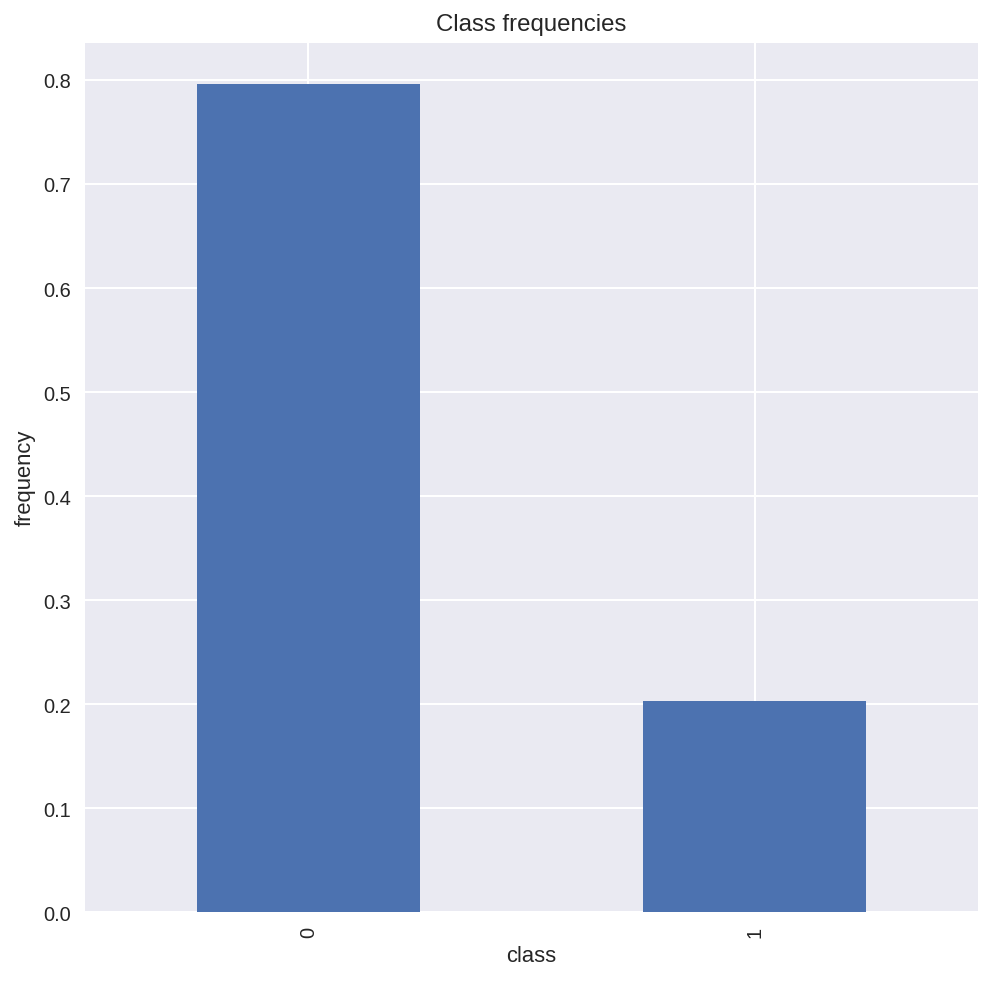

In [23]:
#checking frequency of classes
class_frequency=data['exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar',figsize=(8,8))
plt.title('Class frequencies')
plt.ylabel('frequency')
plt.xlabel('class')
plt.show()

In [24]:
def upsample(features, target, repeat):
    features_zeros=features[target==0]
    features_ones =features[target==1]
    target_zeros =target[target==0]
    target_ones =target[target==1]
    
    features_upsampled=pd.concat([features_zeros] + [features_ones]*repeat)
    target_upsampled=pd.concat([target_zeros]+[target_ones]*repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled,
                                                  target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

best_f1_score=0
best_value_up=0
for value in range(0,10):
    features_upsampled, target_upsampled=upsample(features_train,target_train,value)
    model= DecisionTreeClassifier(random_state=12345, max_depth=5)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid=model.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    if score> best_f1_score:
        best_f1_score=score
        best_value_up=value
        
print('F1 score: ',best_f1_score) 
print('repeat value: ',best_value_up)
features_upsampled, target_upsampled=upsample(features_train,target_train,best_value_up)


F1 score:  0.6054421768707483
repeat value:  3


In [25]:
def downsample(features, target, fraction):
    features_zeros=features[target==0]
    features_ones =features[target==1]
    target_zeros =target[target==0]
    target_ones =target[target==1]
    
    features_downsampled=pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled=pd.concat([target_zeros.sample(frac=fraction, random_state=12345)]+[target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled,
                                                  target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

best_f1_score=0
best_value_d=0
for value in np.arange(0,1.05,0.05):
    features_downsampled, target_downsampled=downsample(features_train,target_train,value)
    model= DecisionTreeClassifier(random_state=12345, max_depth=5)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid=model.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    if score> best_f1_score:
        best_f1_score=score
        best_value_d=value
        
print('F1 score: ',best_f1_score) 
print('frac value',best_value_d)
features_downsampled, target_downsampled=downsample(features_train,target_train,best_value_d)

F1 score:  0.5879828326180258
frac value 0.45


In [26]:
model= DecisionTreeClassifier(random_state=12345, max_depth=best_depth, class_weight='balanced')
model.fit(features_upsampled,target_upsampled)
predict_valid=model.predict(features_valid)

print('f1_score: ',f1_score(target_valid,predicted_valid))
print('accuracy:', model.score(features_valid, target_valid))

f1_score:  0.5153970826580228
accuracy: 0.8055


In [27]:
model_decisiontree_final= DecisionTreeClassifier(random_state=12345, max_depth=best_depth)
model_decisiontree_final.fit(features_upsampled,target_upsampled)
predict_valid=model_decisiontree_final.predict(features_valid)

model_decisiontree_f1=f1_score(target_valid,predict_valid)
model_decisiontree_acc= model_decisiontree_final.score(features_valid, target_valid)
print('f1_score: ',f1_score(target_valid,predict_valid))
print('accuracy:', model_decisiontree_final.score(features_valid, target_valid))


f1_score:  0.6054421768707483
accuracy: 0.826


In this section, we analysed the AUC for the ROC curve. For the DecissionTreeClassifier selected, we observed a value of 0.82, which means that our model performed better and obtained hight TPR values than the random model. 

<Figure size 576x396 with 0 Axes>

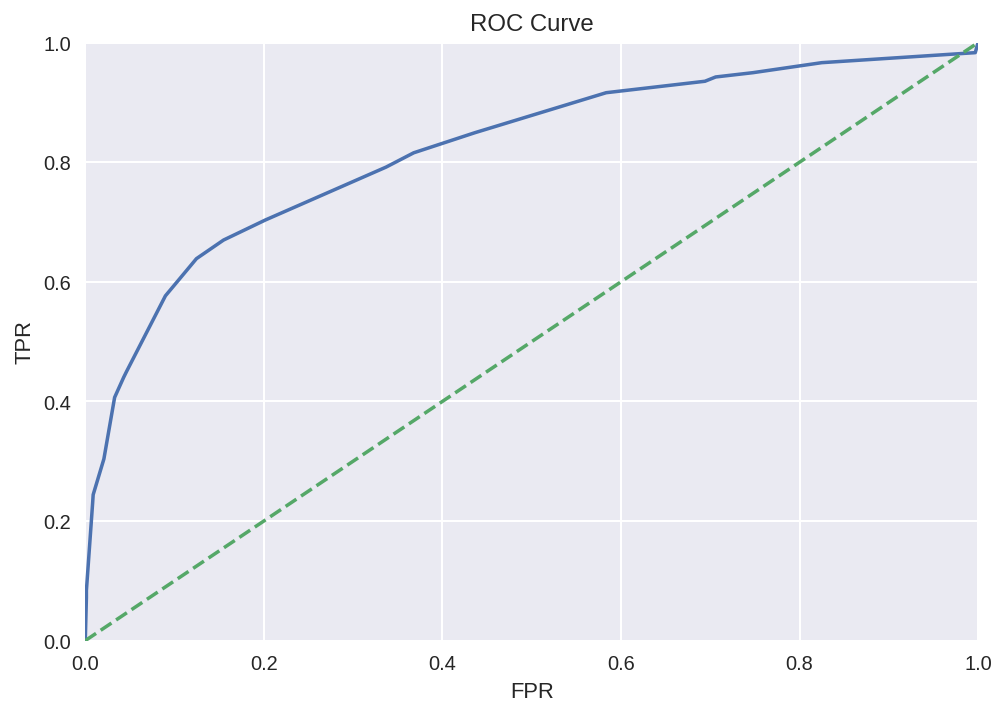

In [28]:
#AUC_ROC 

probabilities_valid=model_decisiontree_final.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr,tpr, thresholds =roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()
plt.show()



In [29]:
#AUC
auc_model_1=roc_auc_score(target_valid,probabilities_one_valid)
print(auc_model_1)

0.8206921164536441


## Model 2: RandomForest
In this section we split the `data` into training, validation, and testing dataset in 2:1:1 ratio, or 60%, 20%, and 20%, respectively. The data was transformed with means of OrdinalEncoder, as shown below. However, the columns that were cardinal features were kept as they were originally present in the data, and then transformed with means of feature scaling, as shown below. The resulting dimensions for features and target for the training, validation, and testing set were prited below. 

In [30]:
encoder= OrdinalEncoder()
data_ordinal=pd.DataFrame(encoder.fit_transform(data),columns=data.columns)
data_ordinal['creditscore']=data['creditscore']
data_ordinal['age']=data['age']
data_ordinal['tenure']=data['tenure']
data_ordinal['balance']=data['balance']
data_ordinal['numofproducts']=data['numofproducts']
data_ordinal['estimatedsalary']=data['estimatedsalary']

features = data_ordinal.drop('exited',axis=1)
target = data_ordinal['exited']

features_train, features_rem, target_train, target_rem = train_test_split(
    features, target, train_size=0.6, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_rem, target_rem, test_size=0.5,random_state=12345)

numeric=['creditscore', 'age', 'tenure','balance','numofproducts', 'estimatedsalary']
scaler=StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric]=scaler.transform(features_train[numeric])
features_valid[numeric]=scaler.transform(features_valid[numeric])
features_test[numeric]=scaler.transform(features_test[numeric])


print(f'features_train:      {features_train.shape}')
print(f'target_train:        {target_train.shape}')

print(f'features_validation: {features_valid.shape}')
print(f'target_validation:   {target_valid.shape}')

print(f'features_test:       {features_test.shape}')
print(f'target_test:         {target_test.shape}')

features_train:      (6000, 13)
target_train:        (6000,)
features_validation: (2000, 13)
target_validation:   (2000,)
features_test:       (2000, 13)
target_test:         (2000,)


/tmp/ipykernel_84/1252073535.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric]=scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_84/1252073535.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In this section, we used the GridSearchCV function to find the optimal value combinations for the hyperparameters `max_depth, min_samples_split,`and `min_samples_leaf`, that would give us the highest F1 score. From the GridSearchCV function, we found that the optimal value combinations for these hyperparamets were 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3 and  'n_estimators' paramater and we found that the optimal value was 47, which resulted in a F1 score of 0.605 and accuracy score of 0.857. 

In [31]:
n_estimators=list(range(1,50,2))
max_depth_list=list(range(1,3))
max_depth_list.append(None)
min_samples_split_list= [x for x in list(range(0,4))]
min_samples_leaf_list=[x for x in list(range(1,4))]


params_grid= {
    'n_estimators':n_estimators,
    'max_depth' : max_depth_list,
    'min_samples_split' : min_samples_split_list,
    'min_samples_leaf' : min_samples_leaf_list,
    
}

num_combinations =1 
for k in params_grid.keys(): num_combinations *=len(params_grid[k])
print('Number of combinations: ', num_combinations)


Number of combinations:  900


In [32]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

model_rf=GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                                                            param_grid=params_grid,
                                                            cv=3,
                                                            scoring='f1_micro',
                                                            return_train_score=True,
                                                            verbose=0,
                                                            n_jobs=1)
                    

model_rf.fit(features_train, target_train)
model_rf.best_params_

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.60983333 0.74166667 0.69866667 0.68116667
 0.70183333 0.73533333 0.7135     0.71383333 0.73383333 0.72333333
 0.7455     0.76816667 0.74816667 0.72183333 0.74       0.75616667
 0.742      0.741      0.75583333 0.75683333 0.73783333 0.76183333
 0.73916667 0.75083333 0.7525     0.617      0.741      0

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 47}

In [33]:
best_params=model_rf.best_params_
n_estimator_result=best_params['n_estimators']
max_depth_result=best_params['max_depth']
min_leaf_result=best_params['min_samples_leaf']
min_split_result=best_params['min_samples_split']
best_params

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 47}

below is the RandomForestClassifier model with the tuned hyperparameters. 

In [34]:
model_randomforest=RandomForestClassifier(n_estimators=n_estimator_result,
         min_samples_split=min_split_result,
         min_samples_leaf=min_leaf_result,
         max_features='sqrt',
         max_depth=max_depth_result,
         criterion= 'gini', random_state=12345)
    
model_randomforest.fit(features_train,target_train)
predict_valid=model_randomforest.predict(features_valid)

print('f1_score: ',f1_score(target_valid,predict_valid))
print('accuracy:', model_randomforest.score(features_valid, target_valid))


f1_score:  0.5611285266457681
accuracy: 0.86


In this section, we analyzed the balance of classes in the target column `exited`. We found out that there were was an inbalance of classes, and that class 0 had 79.6% of data, while class 1 had 20.4%. The techniques used to improve the quality of the model by fixing the inbalance of classes were `upsampling` of the class 1, and `downsampling` of the class 0. These techniques are shown below. From these techniques, we found that upsampling class 1 with a factor of 6 was the optimal factor for usampling. The F1 score we obtained from upsampling class 1 was 0.597. However, we did not see an improvement from upsampling of class 1, but downsampling class 0  we obtained an F1 score of 0.608 from donwsampling class 0. The optimal frac value for downsampling was 0.4. Another technique we used to improve the quality of our model was the `class_weight` parameter. We found that when `class_weight='balanced`, we obtained a f1_score of 0.53 and an accuracy score of 0.857. In contrast, when the `class_weight` was set to default 'None', then we obtained a f1_score of 0.605 and an accuracy score of 0.857. Therefore, the the model with 'class_weight'=None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators'=33, and class zero donwsampled with frac value of 0.4, was selected for AUC of the ROC curve analysis. 

In [35]:
#upsampling
best_f1_score=0
best_value_up=0
for value in range(0,10):
    features_upsampled, target_upsampled=upsample(features_train,target_train,value)
    model=RandomForestClassifier(n_estimators=n_estimator_result,
         min_samples_split=min_split_result,
         min_samples_leaf=min_leaf_result,
         max_features='sqrt',
         max_depth=max_depth_result,
         criterion= 'gini', random_state=12345)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid=model.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    if score> best_f1_score:
        best_f1_score=score
        best_value_up=value
        
print('F1 score: ',best_f1_score) 
print('repeat value: ',best_value_up)

features_upsampled, target_upsampled=upsample(features_train,target_train,best_value_up)

F1 score:  0.6079182630906769
repeat value:  6


In [36]:
best_f1_score_d=0
best_value_d=0
for value in np.arange(0,1.05,0.05):
    features_downsampled, target_downsampled=downsample(features_train,target_train,value)
    model= RandomForestClassifier(n_estimators=n_estimator_result,
         min_samples_split=min_split_result,
         min_samples_leaf=min_leaf_result,
         max_features='sqrt',
         max_depth=max_depth_result,
         criterion= 'gini', random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid=model.predict(features_valid)
    score=f1_score(target_valid, predicted_valid)
    if score> best_f1_score_d:
        best_f1_score_d=score
        best_value_d=value
        
print('F1 score: ',best_f1_score_d) 
print('frac value',best_value_d)
features_downsampled, target_downsampled=downsample(features_train,target_train,best_value_d)

F1 score:  0.6139534883720931
frac value 0.4


In [37]:
model_randomforest_class=RandomForestClassifier(n_estimators=n_estimator_result,
         min_samples_split=min_split_result,
         min_samples_leaf=min_leaf_result,
         max_features='sqrt',
         max_depth=max_depth_result,
         criterion= 'gini', random_state=12345, class_weight='balanced')
    
model_randomforest_class.fit(features_train,target_train)
predict_valid=model_randomforest_class.predict(features_valid)

print('f1_score: ',f1_score(target_valid,predict_valid))
print('accuracy:', model_randomforest_class.score(features_valid, target_valid))


f1_score:  0.5814977973568282
accuracy: 0.8575


In [38]:
model_randomforest_final=RandomForestClassifier(n_estimators=n_estimator_result,
         min_samples_split=min_split_result,
         min_samples_leaf=min_leaf_result,
         max_features='sqrt',
         max_depth=max_depth_result,
         criterion= 'gini', random_state=12345)
    
model_randomforest_final.fit(features_downsampled, target_downsampled)
predict_valid=model_randomforest_final.predict(features_valid)

model_randomforest_f1=f1_score(target_valid,predict_valid)
model_randomforest_acc=model_randomforest_final.score(features_valid, target_valid)

print('f1_score: ',f1_score(target_valid,predict_valid))
print('accuracy:', model_randomforest_final.score(features_valid, target_valid))

f1_score:  0.6139534883720931
accuracy: 0.834


In this section, we analysed the AUC for the ROC curve. For the RandomForestClassifier selected, we observed a value of 0.84, which means that our model performed better and obtained hight TPR values than the random model.

<Figure size 576x396 with 0 Axes>

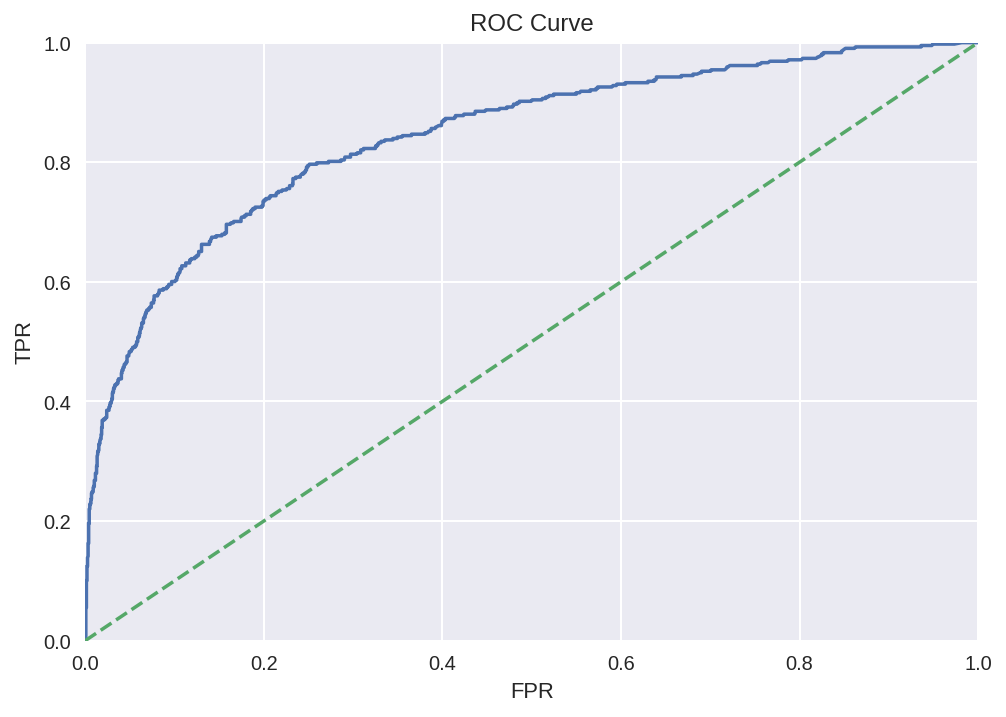

In [39]:
#AUC_ROC 

probabilities_valid=model_randomforest_final.predict_proba(features_valid)
probabilities_one_valid=probabilities_valid[:,1]
fpr,tpr, thresholds =roc_curve(target_valid,probabilities_one_valid)
plt.figure()
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()
plt.show()

In [40]:
auc_model_2=roc_auc_score(target_valid,probabilities_one_valid)
print(auc_model_2)

0.8439411077976517


In this section, we selected the best model based on the highest F1 score from our model. We found that tthe RandomForestClassifier model perfomed better with an F1 score of 0.61, and accuracy score f 0.83, and an AUC value for the ROC curve of 0.84. Below is a summary of both models' performance with the validation test. 

## Selecting Best model


In [41]:
print('DecisionTreeClassifier F1 score:      ',model_decisiontree_f1)
print('DecisionTreeClassider Accuracy score: ',model_decisiontree_acc)
print('DecisionTreeClassifier AUC score      ',auc_model_1)
print()

print('RandomForestClassifier F1 score:      ',model_randomforest_f1)
print('RandomForestClassifier Accuracy score:',model_randomforest_acc)
print('RandomForestClassifier AUC score      ',auc_model_2)
print()

if model_decisiontree_f1>model_randomforest_f1:
    
    print("DecisionTreeClassifier model selected for further analysis")
if model_decisiontree_f1<model_randomforest_f1:
    
    print("RandomForestClassifier model selected for further analysis")

DecisionTreeClassifier F1 score:       0.6054421768707483
DecisionTreeClassider Accuracy score:  0.826
DecisionTreeClassifier AUC score       0.8206921164536441

RandomForestClassifier F1 score:       0.6139534883720931
RandomForestClassifier Accuracy score: 0.834
RandomForestClassifier AUC score       0.8439411077976517

RandomForestClassifier model selected for further analysis


Below is the final testing of the testing data using the RandomForestClassifier model we selected as our best mode. From the final testing, we obtained an F1 score for the testing data of 0.591, an accuracy score of 0.825, and an AUC value for the ROC curve of 0.843.

In [42]:
predict_test=model_randomforest_final.predict(features_test)
print('test data F1 score: ',f1_score(target_test,predict_test))
print('test data accuracy score:', model_randomforest_final.score(features_test, target_test))

test data F1 score:  0.5906499429874573
test data accuracy score: 0.8205


<Figure size 576x396 with 0 Axes>

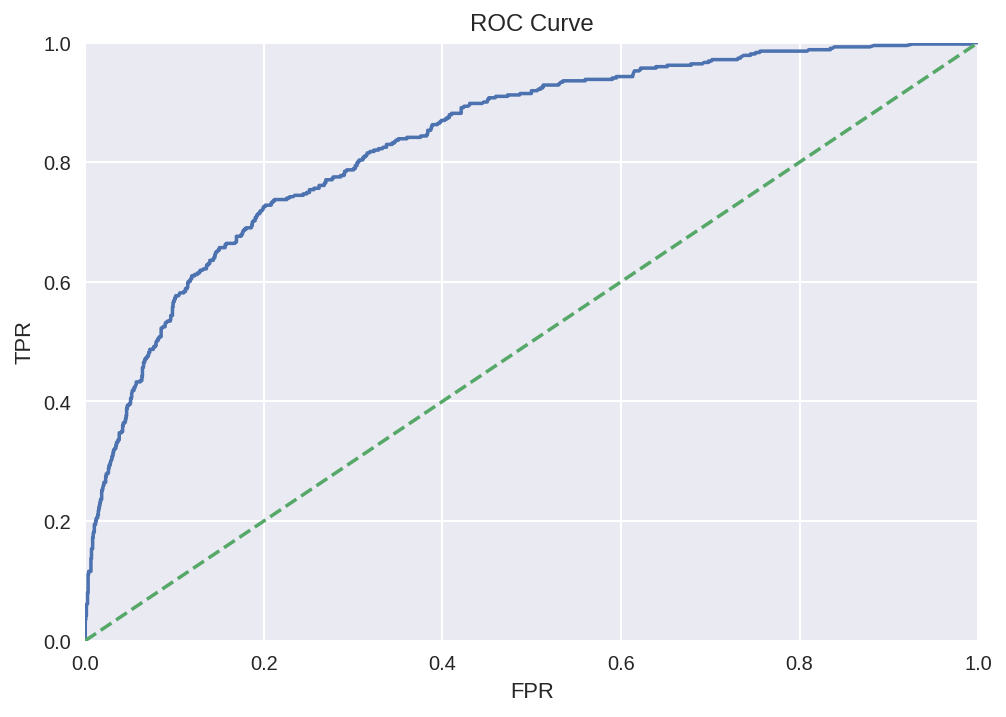

In [43]:
probabilities_test=model_randomforest_final.predict_proba(features_test)
probabilities_one_test=probabilities_test[:,1]
fpr,tpr, thresholds =roc_curve(target_test,probabilities_one_test)
plt.figure()
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()
plt.show()

In [44]:
auc_model_2=roc_auc_score(target_valid,probabilities_one_valid)
print(auc_model_2)

0.8439411077976517


## Conclusion 
We concluded that the best model for predicting whether a client will leave Beta bank was a RandomForestClassifier model with the following tuned hyperparameters: 'max_depth': None, 'min_samples_leaf': 2,'min_samples_split': 3, and 'n_estimators': 47. We also found that downsampling class 0 from the `exiting` column to a fraction of 0.4 resulted in an F1 score of 0.591, accuracy score of 0.821, and and AUC score for the ROC curve of 0.844, for the testing data. 